In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('/content/Fish (1).csv')

In [67]:
df.head()

,Species,Length1,Length2,Length3,Height,Width,Price
0,Bream,23.2,25.4,30.0,11.5200,4.0200,242.0
1,Bream,24.0,26.3,31.2,12.4800,4.3056,290.0
2,Bream,23.9,26.5,31.1,12.3778,4.6961,340.0
3,Bream,26.3,29.0,33.5,12.7300,4.4555,363.0
4,Bream,26.5,29.0,34.0,12.4440,5.1340,430.0


In [68]:
df.describe()

,Length1,Length2,Length3,Height,Width,Price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,26.247170,28.415723,31.227044,8.970994,4.417486,398.326415
std,9.996441,10.716328,11.610246,4.286208,1.685804,357.978317
min,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000
25%,19.050000,21.000000,23.150000,5.944800,3.385650,120.000000
50%,25.200000,27.300000,29.400000,7.786000,4.248500,273.000000
75%,32.700000,35.500000,39.650000,12.365900,5.584500,650.000000
max,59.000000,63.400000,68.000000,18.957000,8.142000,1650.000000


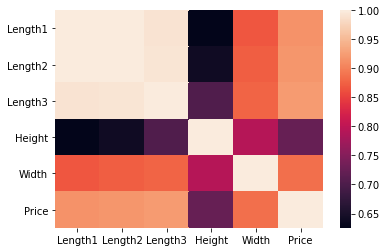

In [69]:
sns.heatmap(df.corr())

In [70]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species']= label_encoder.fit_transform(df['Species'])

In [71]:
df.head()

,Species,Length1,Length2,Length3,Height,Width,Price
0,0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,0,24.0,26.3,31.2,12.4800,4.3056,290.0
2,0,23.9,26.5,31.1,12.3778,4.6961,340.0
3,0,26.3,29.0,33.5,12.7300,4.4555,363.0
4,0,26.5,29.0,34.0,12.4440,5.1340,430.0


In [72]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [75]:
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
y_pred = reg.predict(X_test)

In [77]:
reg.score(X_test,y_test)

0.9731573239833733

In [78]:
from sklearn.externals import joblib
joblib.dump(reg, 'model_fish2.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model_fish2.pkl']

In [79]:
model = joblib.load(open("model_fish2.pkl", 'rb'))

In [62]:
import pickle
pickle.dump(reg, open('model_fish1.pkl', 'wb'))

In [63]:
model = pickle.load(open("model_fish1.pkl", 'rb'))

In [80]:
print(model.predict([[0,23,25,30,12,4]]))

[251.76]
